Condiciones:
<div>
  <ul>
    <li>Solo se debe usar la regresión lineal para el entrenamiento del modelo.</li>
    <li>Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.</li>
    <li>El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.</li>
    <li>Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).</li>
    <li>Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.</li>      
  </ul>
</div>
Los datos son sintéticos: los detalles del contrato y las características del pozo no se publican.







In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats as st
import math
import seaborn as sns

<h2>Descarga y prepara los datos. Explica el procedimiento.</h2>

In [299]:
data_1 = pd.read_csv('geo_data_0.csv')
data_2 = pd.read_csv('geo_data_1.csv')
data_3 = pd.read_csv('geo_data_2.csv')


In [300]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [301]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [302]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [303]:
data_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [304]:
data_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [305]:
data_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [306]:
data_1.duplicated().sum()

0

In [307]:
data_2.duplicated().sum()

0

In [308]:
data_3.duplicated().sum()

0

In [309]:
columns=['f0','f1','f2','product']

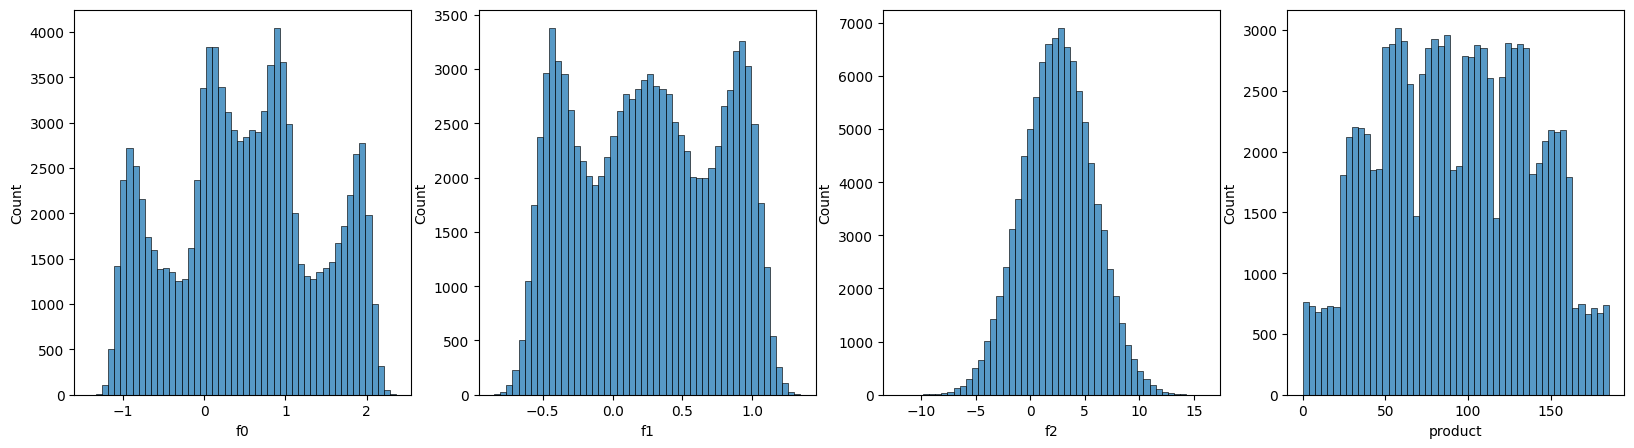

In [103]:
plt.subplots(figsize=(20,5))
for indice,columna in enumerate(columns):
    grafico=sns.histplot(data=data_1, x=columna, bins=50, ax=plt.subplot(1,len(columns), indice+1))

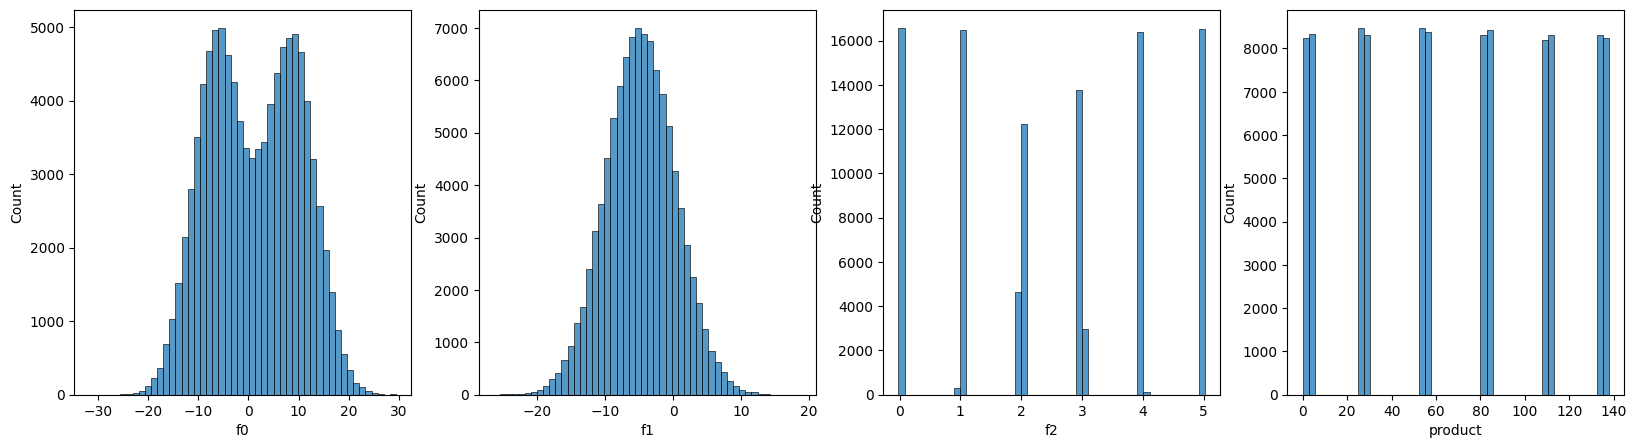

In [104]:
plt.subplots(figsize=(20,5))
for indice,columna in enumerate(columns):
    grafico=sns.histplot(data=data_2, x=columna, bins=50, ax=plt.subplot(1,len(columns), indice+1))

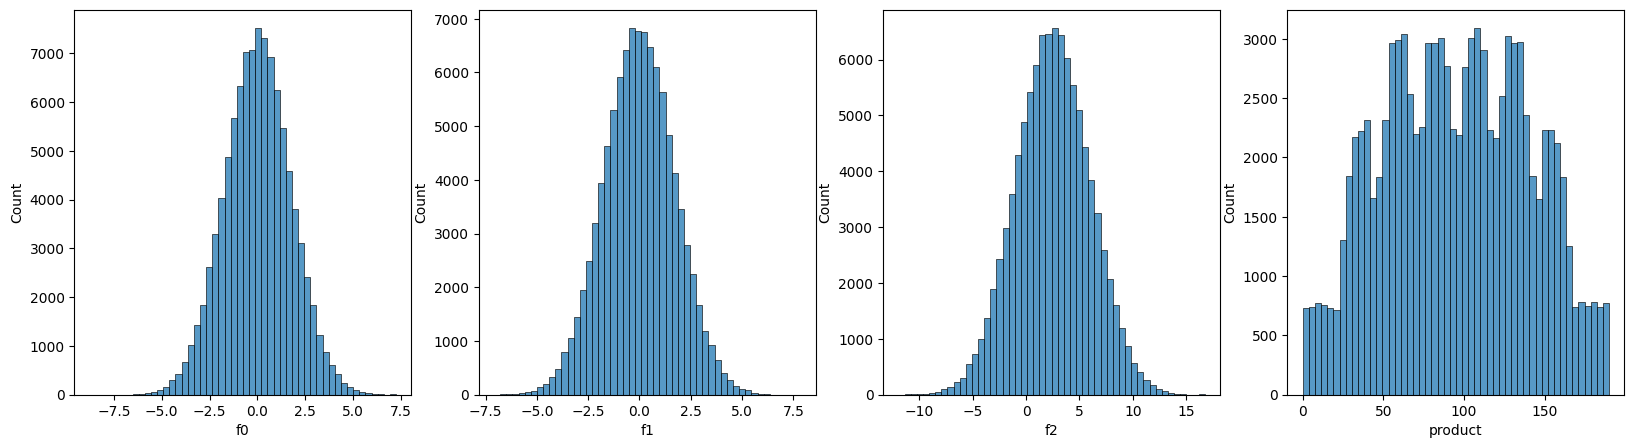

In [105]:
plt.subplots(figsize=(20,5))
for indice,columna in enumerate(columns):
    grafico=sns.histplot(data=data_3, x=columna, bins=50, ax=plt.subplot(1,len(columns), indice+1))

Scatter Region 1,f0


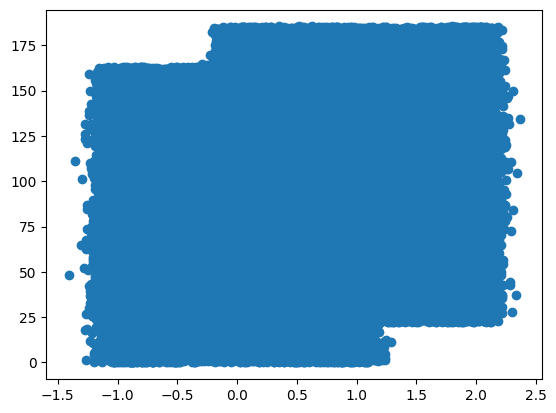

In [158]:
print('Scatter Region 1,f0')

fig, ax=plt.subplots()
ax.scatter(data_1['f0'], data_1['product'])


Scatter Region 1,f1


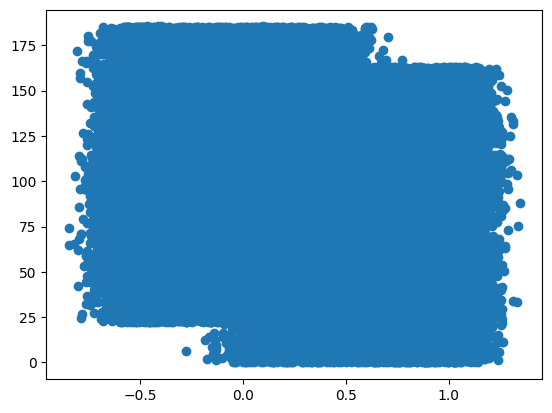

In [162]:
print('Scatter Region 1,f1')
fig, ax=plt.subplots()
ax.scatter(data_1['f1'], data_1['product'])

Scatter Region 1, f2


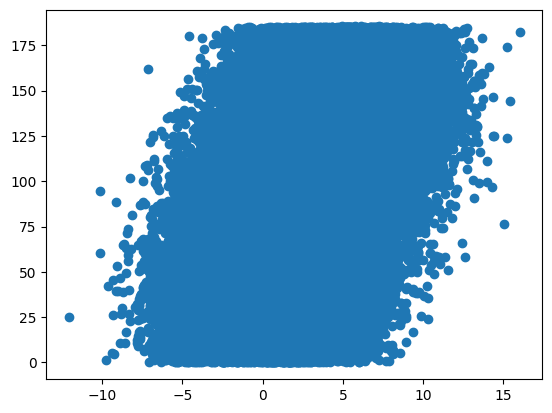

In [163]:
print('Scatter Region 1, f2')

fig, ax=plt.subplots()
ax.scatter(data_1['f2'], data_1['product'])

In [164]:
data_1.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [165]:
data_2.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [166]:
data_3.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


Scatter Region 2,f0


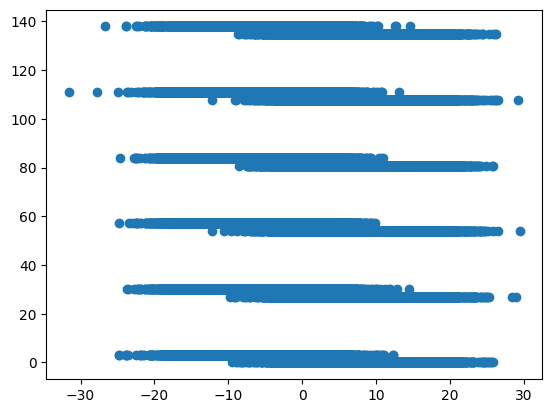

In [167]:
print('Scatter Region 2,f0')

fig, ax=plt.subplots()
ax.scatter(data_2['f0'], data_2['product'])

Scatter Region 2,f1


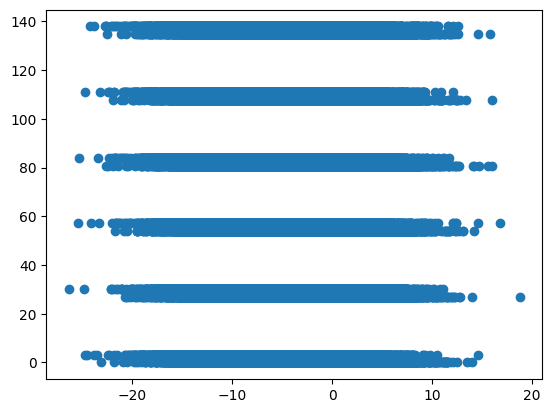

In [168]:
print('Scatter Region 2,f1')

fig, ax=plt.subplots()
ax.scatter(data_2['f1'], data_2['product'])

Scatter Region 2, f2 


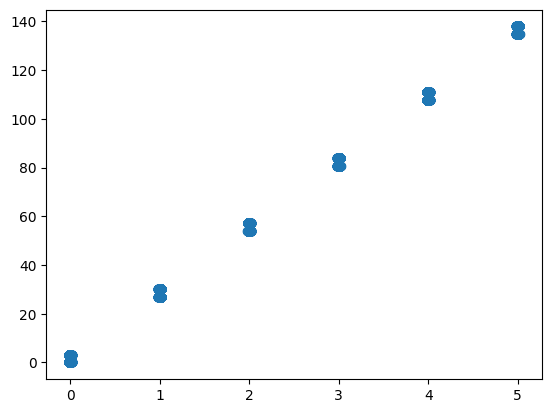

In [169]:
print('Scatter Region 2, f2 ')

fig, ax=plt.subplots()
ax.scatter(data_2['f2'], data_2['product'])

Scatter REgion 3,f0


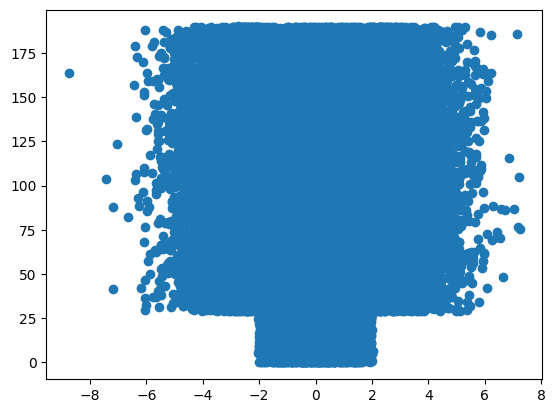

In [170]:
print('Scatter REgion 3,f0')

fig, ax=plt.subplots()
ax.scatter(data_3['f0'], data_3['product'])

Scatter Region 3 , f1


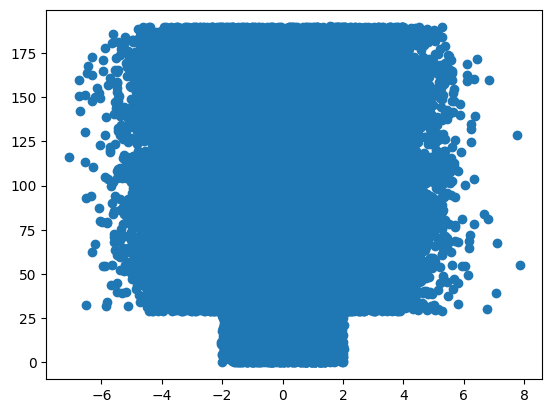

In [171]:
print('Scatter Region 3 , f1')

fig, ax=plt.subplots()
ax.scatter(data_3['f1'], data_3['product'])

Scatter Region 3, f2


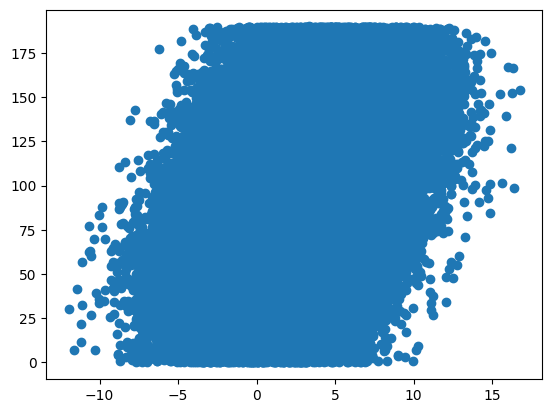

In [310]:
print('Scatter Region 3, f2')

fig, ax=plt.subplots()
ax.scatter(data_3['f2'], data_3['product'])

<B><FONT COLOR=blue>NO HAY TANTO DATOS REPETIDOS , NI NULOS, ADEMÁS PODEMOS NOTAR LA CORRELACION ENTRE CADA REGION Y SU PRODUCTO, AUNQUE TENEMOS LA OBSERVACION SOBRE LA REGION 2 EN F2 Y SU PRODUCTO LA CUAL TIENE UNA CORRELACION BASTANTE ALTA , EN CUANTO A LOS DATOS , SOLO HABRA QUE MODIFICAR EL ID DE LOS 3 CONJUNTOS A QUE ES IRRELEVANTE PARA LA TAREA. </B></FONT>

<h2>Entrena y prueba el modelo para cada región en geo_data_0.csv:</h2>




<h3>Divide los datos en un conjunto de entrenamiento y un conjunto de validación en una proporción de 75:25</h3>


In [311]:
state=np.random.RandomState(12345)

In [312]:
data_1_p=data_1.drop('id',axis=1)
data_1_p
target_d1 = data_1_p['product']
features_d1 = data_1_p.drop('product', axis=1)
features_d1
features_train_d1, features_valid_d1, target_train_d1, target_valid_d1 = train_test_split(
features_d1, target_d1, test_size=0.25, random_state=state)
print(features_train_d1.size)
print(target_train_d1.size)

225000
75000


<h3>Entrena el modelo y haz predicciones para el conjunto de validación.</h3>


In [313]:
model=LinearRegression()
model.fit(features_train_d1,target_train_d1)
predict_d1=model.predict(features_valid_d1)
rsme=mean_squared_error(target_valid_d1, predict_d1,squared=False)
print('RSME_REGION_1: ',rsme)
mean_pred=predict_d1.mean()
print('VOLUMEN MEDIO REGION_1:',mean_pred)

RSME_REGION_1:  37.5794217150813
VOLUMEN MEDIO REGION_1: 92.59256778438035


<h3>Guarda las predicciones y las respuestas correctas para el conjunto de validación.</h3>
<h3>Muestra el volumen medio de reservas predicho y RMSE del modelo.</h3>
<h3>Analiza los resultados.</h3>
<h3>Coloca todos los pasos previos en funciones, realiza y ejecuta los pasos 2.1-2.5 para los archivos 'geo_data_1.csv' y 'geo_data_2.csv'.</h3>

<B><FONT COLOR=blue> se hace el entrenamiento del modelo en conjunto con la funcion para los datos de cada region<B></FONT>

In [315]:
state=np.random.RandomState(54321)

In [316]:

def entr(geo_data, random_state=state):
    target = geo_data['product']
    features = geo_data.drop('product', axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=state)
    model=LinearRegression()
    model.fit(features_train,target_train)
    predict_m=model.predict(features_valid)
    rsme=mean_squared_error(target_valid, predict_m,squared=False)
    print('RSME: ',rsme)
    mean_pred_m=predict_m.mean()
    print('VOLUMEN PROMEDIO: ',mean_pred_m)
    precio_total__m=mean_pred_m *74.59*1000
    print('Precio total promedio: ', mean_pred_m *74.59*1000)
   
    print()
    return rsme, mean_pred_m,precio_total__m,pd.DataFrame(dict(valor_pred=predict_m, valor_real=target_valid))

In [317]:
data_2_p=data_2.drop('id',axis=1)
data_3_p=data_3.drop('id',axis=1)

In [318]:
entr(data_1_p)

RSME:  37.68341093860808
VOLUMEN PROMEDIO:  92.15921155743655
Precio total promedio:  6874155.590069192



(37.68341093860808,
 92.15921155743655,
 6874155.590069192,
        valor_pred  valor_real
 47590  110.101190   96.485709
 39469  122.700895  155.642351
 88291   84.023603   78.784777
 46565   95.975692  120.530381
 55316   83.437307   99.818807
 ...           ...         ...
 27645  121.352066  157.240437
 57064  107.131396  143.443160
 73541   97.346248  117.909556
 10466  131.189324  130.134401
 14296  112.040388  128.887513
 
 [25000 rows x 2 columns])

In [319]:
entr(data_2_p)

RSME:  0.8885222400411976
VOLUMEN PROMEDIO:  68.88432201515047
Precio total promedio:  5138081.579110074



(0.8885222400411976,
 68.88432201515047,
 5138081.579110074,
        valor_pred  valor_real
 14659    3.400360    3.179103
 91053   56.352065   57.085625
 57960   56.093832   57.085625
 13247   27.939544   30.132364
 32713   81.275973   80.859783
 ...           ...         ...
 67274  138.654853  137.945408
 50689   54.556852   53.906522
 65130   54.277772   53.906522
 41863   80.867665   80.859783
 93742  109.849964  110.992147
 
 [25000 rows x 2 columns])

In [320]:
entr(data_3_p)

RSME:  40.136726733973994
VOLUMEN PROMEDIO:  95.17807449209
Precio total promedio:  7099332.576364994



(40.136726733973994,
 95.17807449209,
 7099332.576364994,
        valor_pred  valor_real
 61174   78.440289  130.976266
 30172  132.796129  155.460159
 61787   54.414898   28.412122
 23654  101.673526  122.149695
 14464  107.593360  189.976606
 ...           ...         ...
 42018  115.280467  103.068660
 48596   90.029759  164.365798
 67116   97.338276    6.310441
 31027   97.628004   44.910670
 67206  131.985493  167.230750
 
 [25000 rows x 2 columns])

 <B><FONT COLOR=blue>EN CUANTO A LAS REGIONES QUE SE DEDUCEN, SE PUEDE DECIR QUE LA SEGUNDA REGION MANEJA UN ERROR MENOR A COMPARACION DE LAS OTRAS DOS, LA TERCERA REGION TIENE UN PROMEDIO DE GANANCIA SUPERIOR, SIN EMBARGO SU RIESGO DE PERDIDA ES MAYOR CONSIDERANDO EL ERROR QUE MANEJA, POR LO TANTO LA REGION MAS FACTIBLE DE INVERSION ES LA PRIMERA REGION, YA QUE NOS MUESTRA UN VOLUMEN A CONSIDERAR Y SU ERROR ES MENOR A LA TERCERA REGION. </B></FONT>

RSME:  37.68341093860808
VOLUMEN PROMEDIO:  92.15921155743655
Precio total promedio:  6874155.590069192
    
RSME:  0.8885222400411976
VOLUMEN PROMEDIO:  68.88432201515047
Precio total promedio:  5138081.579110074

RSME:  40.136726733973994
VOLUMEN PROMEDIO:  95.17807449209
Precio total promedio:  7099332.576364994   

<H2>	Prepárate para el cálculo de ganancias:</H2>
<H3>	Almacena todos los valores necesarios para los cálculos en variables separadas.</H3>
<H3>	Dada la inversión de 100 millones por 200 pozos petrolíferos, de media un pozo petrolífero debe producir al menos un valor de 500,000 dólares en unidades para evitar pérdidas (esto es equivalente a 111.1 unidades). Compara esta cantidad con la cantidad media de reservas en cada región.</H3>
<H3>Presenta conclusiones sobre cómo preparar el paso para calcular el beneficio.</H3>


<H2>	Escribe una función para calcular la ganancia de un conjunto de pozos de petróleo seleccionados y modela las predicciones:</H2>
<H3>	Elige los 200 pozos con los valores de predicción más altos de cada una de las 3 regiones (es decir, archivos 'csv').</H3>
<H3>	Resume el volumen objetivo de reservas según dichas predicciones. Almacena las predicciones para los 200 pozos para cada una de las 3 regiones.</H3>
<H3>	Calcula la ganancia potencial de los 200 pozos principales por región. Presenta tus conclusiones: propón una región para el desarrollo de pozos petrolíferos y justifica tu elección.</H3>


In [321]:
inversion=100000000 #100 millones
ingreso= 4500 #4.5 por 1000 
pozos=200 
unidades_min=111.11 #produccion minima en unidades para evitar perdidas 

In [322]:
vol_min =inversion / ingreso
vol_min

22222.222222222223

In [323]:
vol_min /pozos

111.11111111111111

In [324]:
produccion_pozo_valor=inversion/pozos
produccion_pozo_valor

500000.0

In [325]:
entr(data_1_p)[3]

RSME:  37.828054194058865
VOLUMEN PROMEDIO:  92.54347378351981
Precio total promedio:  6902817.709512743



,valor_pred,valor_real
22111,115.427928,84.554116
45173,84.270188,126.322591
99924,79.046902,105.436458
22202,62.327578,37.545972
61276,104.907424,112.600782
...,...,...
27536,72.395865,97.692185
4097,101.598541,84.586256
55464,86.677294,112.840776
96830,108.396844,48.153943


In [326]:
regiones=['R_1','R_2','R_3']
datas=[data_1_p,data_2_p,data_3_p]

In [327]:
pred_3r={}

In [328]:
for data, region in zip(datas, regiones):
    pred_3r[region]=entr(data)[3]

RSME:  37.55600449983178
VOLUMEN PROMEDIO:  92.5482626174188
Precio total promedio:  6903174.908633268

RSME:  0.8891564796270996
VOLUMEN PROMEDIO:  68.97189337967805
Precio total promedio:  5144613.527190186

RSME:  39.92653558125212
VOLUMEN PROMEDIO:  95.01388147598429
Precio total promedio:  7087085.419293668



4.1   Elige los 200 pozos con los valores de predicción más altos de cada una de las 3 regiones (es decir, archivos 'csv').

In [330]:
r1_200_pred=pred_3r['R_1'].sort_values(by='valor_pred', ascending=False)['valor_real'].head(200)

In [331]:
r2_200_pred=pred_3r['R_2'].sort_values(by='valor_pred', ascending=False)['valor_real'].head(200)

In [332]:
r3_200_pred=pred_3r['R_3'].sort_values(by='valor_pred', ascending=False)['valor_real'].head(200)

In [333]:
print(r1_200_pred)

52356    123.920559
27658    140.631646
78948    162.153488
16373    116.045820
6496     178.879516
            ...    
37605    144.227824
53028    121.869044
86613    154.989134
45791    157.384580
28147    143.811663
Name: valor_real, Length: 200, dtype: float64


In [334]:
print(r2_200_pred)

38665    137.945408
19483    137.945408
24274    137.945408
2242     137.945408
42432    137.945408
            ...    
60139    137.945408
10366    137.945408
61326    137.945408
42400    137.945408
76025    137.945408
Name: valor_real, Length: 200, dtype: float64


In [335]:
print(r3_200_pred)

89165     97.775979
75079    181.617067
82661    141.160070
63953    174.710804
40231     90.980193
            ...    
14680    167.801336
21142    134.738129
20733    151.822825
61199    141.625329
29594    151.726598
Name: valor_real, Length: 200, dtype: float64


In [336]:
r1_sum=r1_200_pred.sum()
r1_sum

29365.580530940657

In [337]:
r2_sum=r2_200_pred.sum()
r2_sum

27589.081548181137

In [341]:
r3_sum=r3_200_pred.sum()
r3_sum

27457.334639849974

In [342]:
print((r1_sum*ingreso)-inversion)
print((r2_sum*ingreso)-inversion)
print((r3_sum*ingreso)-inversion)

32145112.389232963
24150866.966815114
23558005.879324883



 <B><FONT COLOR=blue>LA REGION 1 TIENE MAYOR BENEFICIO Y RIESGO SIGNIFICATIVO PERO TAMPOCO SE PUEDE APOSTAR POR EL MENOR RIESGO, CON LA MENOR GANANCIA O EL MAYOR RIESGO CON LA MAYOR GANANCIA COMO EN LAS OTRAS 2 REGIONES SI ES QUE SE QUIERE HACER UNA INVERSION MILLONARIA </B></FONT>


<H2>	Calcula riesgos y ganancias para cada región:</H2>
<H3>	Utilizando las predicciones que almacenaste en el paso 4.2, emplea la técnica del bootstrapping con 1000 muestras para hallar la distribución de los beneficios.</H3>
<H3>	Encuentra el beneficio promedio, el intervalo de confianza del 95% y el riesgo de pérdidas. La pérdida es una ganancia negativa, calcúlala como una probabilidad y luego exprésala como un porcentaje.</H3>
<H3>	Presenta tus conclusiones: propón una región para el desarrollo de pozos petrolíferos y justifica tu elección. ¿Coincide tu elección con la elección anterior en el punto 4.3?</H3>


In [266]:
state=np.random.RandomState(12345)

In [347]:
def bootstr(datos, n_muestras=1000):
    beneficio_muestra =[]
    
    for i in range(n_muestras):
        sample=datos.sample(n=500, replace= True, random_state=state)
        beneficio_muestra.append(margen(sample))
    
    beneficio =pd.Series(beneficio_muestra)
    return beneficio
        

In [348]:
bootstr(pred_3r['R_1'])

0      5.617523e+06
1      5.426940e+06
2      7.346744e+06
3      5.505287e+06
4      3.164555e+06
           ...     
995    2.747677e+06
996    6.675029e+06
997    4.829204e+06
998    8.986735e+06
999    8.668642e+05
Length: 1000, dtype: float64

In [349]:
bootstr(pred_3r['R_2'])

0      3.093113e+06
1      3.792240e+06
2      6.731804e+06
3      1.309222e+06
4      6.411475e+06
           ...     
995    5.262022e+06
996    2.073658e+06
997    5.897082e+06
998    2.986130e+06
999    2.807616e+06
Length: 1000, dtype: float64

In [350]:
bootstr(pred_3r['R_3'])

0      2.333060e+06
1      2.237519e+06
2      5.985592e+06
3      4.431763e+06
4      3.768808e+06
           ...     
995    4.159500e+06
996    7.169001e+05
997    2.238029e+06
998    1.516244e+06
999   -1.582610e+06
Length: 1000, dtype: float64

In [351]:
bootstr(pred_3r['R_1']).mean()

4647414.96140543

In [352]:
bootstr(pred_3r['R_2']).mean()

4333093.251751145

In [353]:
bootstr(pred_3r['R_2']).mean()

4272541.714179905

5.2   Encuentra el beneficio promedio, el intervalo de confianza del 95% y el riesgo de pérdidas. La pérdida es una ganancia negativa, calcúlala como una probabilidad y luego exprésala como un porcentaje

In [358]:
def calculo_confianza(serie_beneficio, region):
    alpha=0.05 #intevalo de confianza 95%
    interval=st.t.interval(alpha,df=len(pred_3r[region])-1,loc=pred_3r[region].mean(),scale=st.sem(pred_3r[region]))
    lower = serie_beneficio.quantile(0.025)#definir el intervalo inferior  al alpha 
    upper = serie_beneficio.quantile(0.95) ##definir el intervalo superior al alpha
    boot_mean=bootstr(pred_3r[region]).mean()#calculamos el promedio del beneficio estresado
    perdida=((boot_mean-inversion)/inversion)*100
    #Calculamos las perdidas 
    
    #imprimimos el intervalo de confianza 
    # imprimimos el beneficio promedio 
    #imprimimos la perdida 
    print(lower)
    print(upper)
    print(f"Intervalo de confianza para la region {region} : {interval}")
    print(f"beneficio promedio de la region {region}: {boot_mean}")
    print(f"perdida de la region {region}: {perdida} %")

In [359]:

calculo_confianza(bootstr(pred_3r['R_1']), 'R_1')

12525.726839271561
9185716.66051331
Intervalo de confianza para la region R_1 : (array([92.53916338, 92.87316855]), array([92.55736185, 92.90833179]))
beneficio promedio de la region R_1: 4571327.572760407
perdida de la region R_1: -95.42867242723959 %


In [360]:
calculo_confianza(bootstr(pred_3r['R_2']), 'R_2')

-60604.686207786195
7766902.216600524
Intervalo de confianza para la region R_2 : (array([68.95378029, 68.93937721]), array([68.99000647, 68.97561067]))
beneficio promedio de la region R_2: 4212434.283417354
perdida de la region R_2: -95.78756571658265 %


In [361]:
calculo_confianza(bootstr(pred_3r['R_3']), 'R_3')

-1523421.5517726634
7807152.388320881
Intervalo de confianza para la region R_3 : (array([95.00603321, 94.60302445]), array([95.02172974, 94.63849057]))
beneficio promedio de la region R_3: 3459094.4235124993
perdida de la region R_3: -96.5409055764875 %


 <B><FONT COLOR=blue>HAY UNA PERDIDA DEL 95% EN LA INVERSION LA CUAL ES MUY RIESGOSA, PERO A COMPARACION DE LAS OTRAS REGIONES ES MEJOR YA QUE EN LAS OTRAS REGIONES SE PUEDE VER QUE HAY UNAS PERDIDAS MAS NOTABLES PERO UN BENEFICIO MENOR , EN LA REGION 1 TENEMOS UN BENEFICIO DE 4.5 MILLONES </B></FONT>